# Assignment14_Decision Tree(Company)

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

# 1 - Business Problem

A cloth manufacturing company is interested to know about the segment or attributes causes high sale

# 2 - Data collection and description

In [87]:
df = pd.read_csv("Company_Data.csv")
df1 = df.copy()
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [88]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [89]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [90]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [91]:
df1.shape

(400, 11)

C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


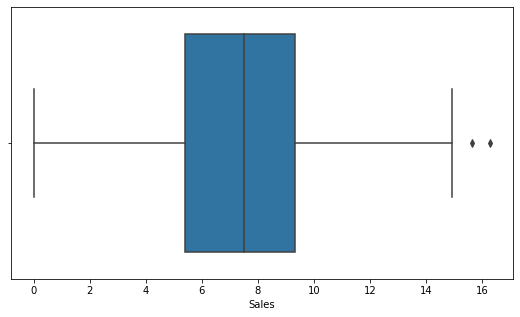

In [92]:
ax = sns.boxplot(df1['Sales'])  #Outlier Check

The data has 2 outlier instances

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


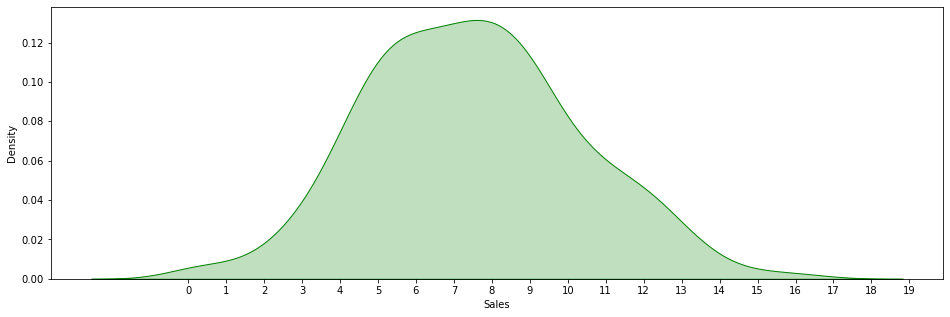

In [93]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

# The data is Skwed on the right
The data has negative Kurtosis

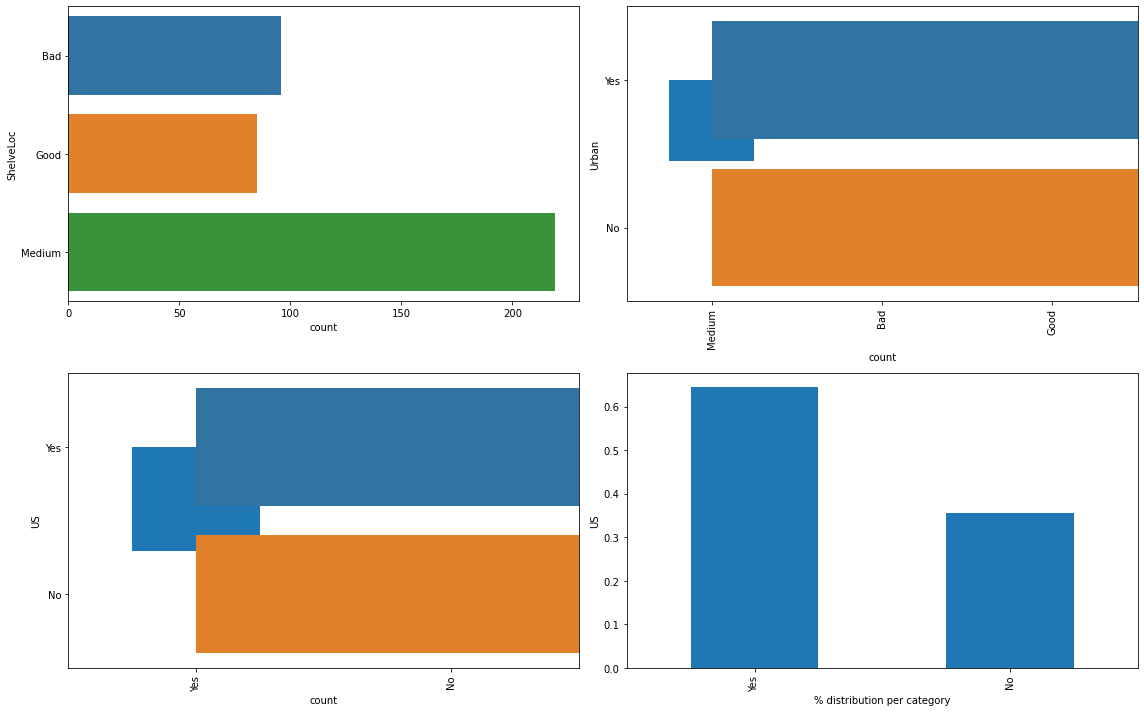

In [94]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

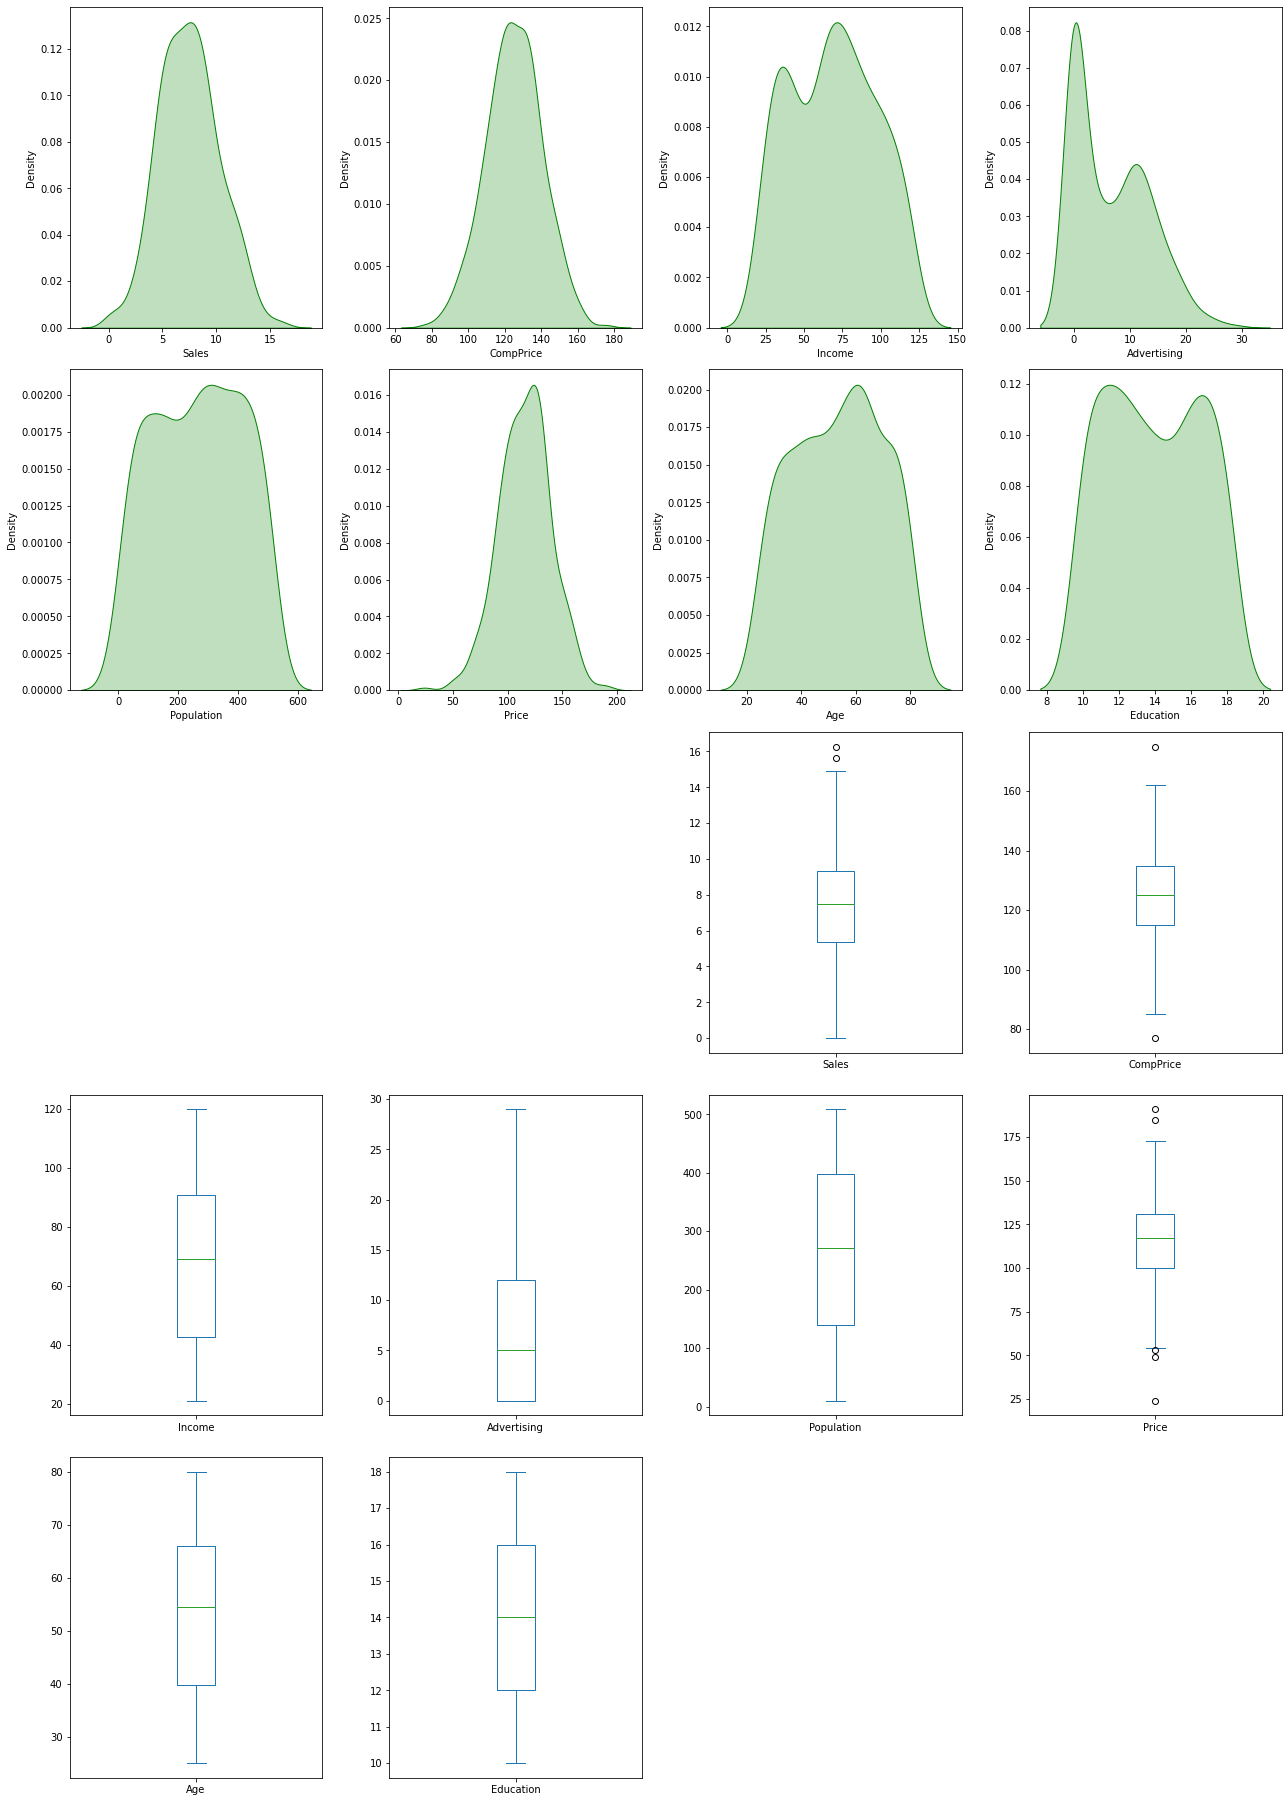

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [95]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])


<AxesSubplot:>

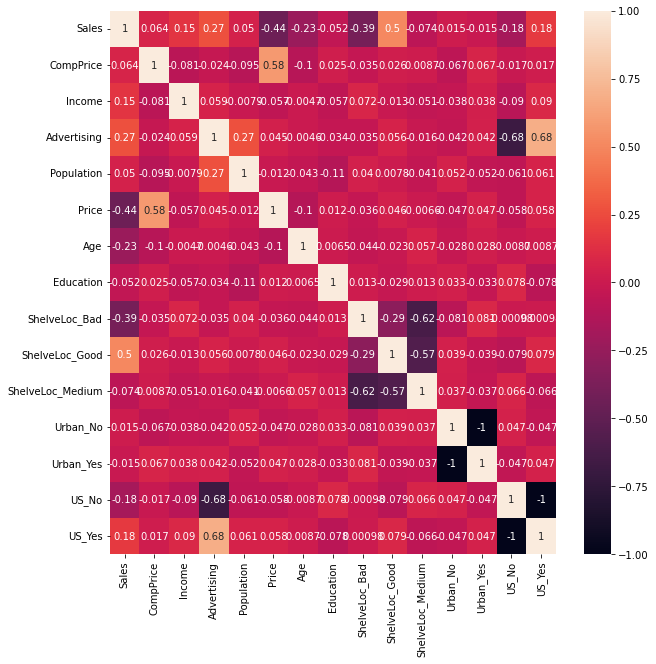

In [96]:
corr = df1.corr()
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# 3 - Decision Tree - Model

# Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [97]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [98]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [99]:
pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

1.0

In [100]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [101]:
pred_test = model.predict(x_test)
accuracy_score(y_test,pred_test)

0.7

In [102]:
confusion_matrix(y_test,pred_test)

array([[28, 12],
       [12, 28]], dtype=int64)

In [103]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df_t

,Actual,Predicted
48,small,small
289,large,small
241,large,large
391,small,large
93,large,large
...,...,...
369,large,small
285,large,large
85,large,small
173,small,small


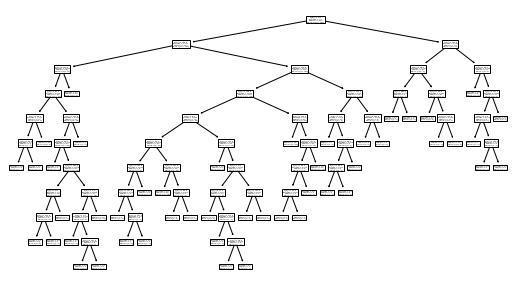

In [104]:
tree.plot_tree(model);

In [105]:
df1.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes', 'sales'],
      dtype='object')

[Text(856.0227272727273, 1037.7818181818182, 'ShelveLoc_Good <= 0.5\nentropy = 1.0\nsamples = 320\nvalue = [159, 161]\nclass = large'),
 Text(481.9090909090909, 938.9454545454546, 'Price <= 105.5\nentropy = 0.971\nsamples = 250\nvalue = [100, 150]\nclass = large'),
 Text(152.1818181818182, 840.1090909090909, 'CompPrice <= 123.5\nentropy = 0.894\nsamples = 87\nvalue = [60, 27]\nclass = small'),
 Text(126.81818181818181, 741.2727272727273, 'Price <= 81.5\nentropy = 0.982\nsamples = 64\nvalue = [37, 27]\nclass = small'),
 Text(76.0909090909091, 642.4363636363637, 'Income <= 49.0\nentropy = 0.323\nsamples = 17\nvalue = [16, 1]\nclass = small'),
 Text(50.72727272727273, 543.6, 'Price <= 76.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = small'),
 Text(25.363636363636363, 444.76363636363635, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = large'),
 Text(76.0909090909091, 444.76363636363635, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = small'),
 Text(101.45454545454545, 54

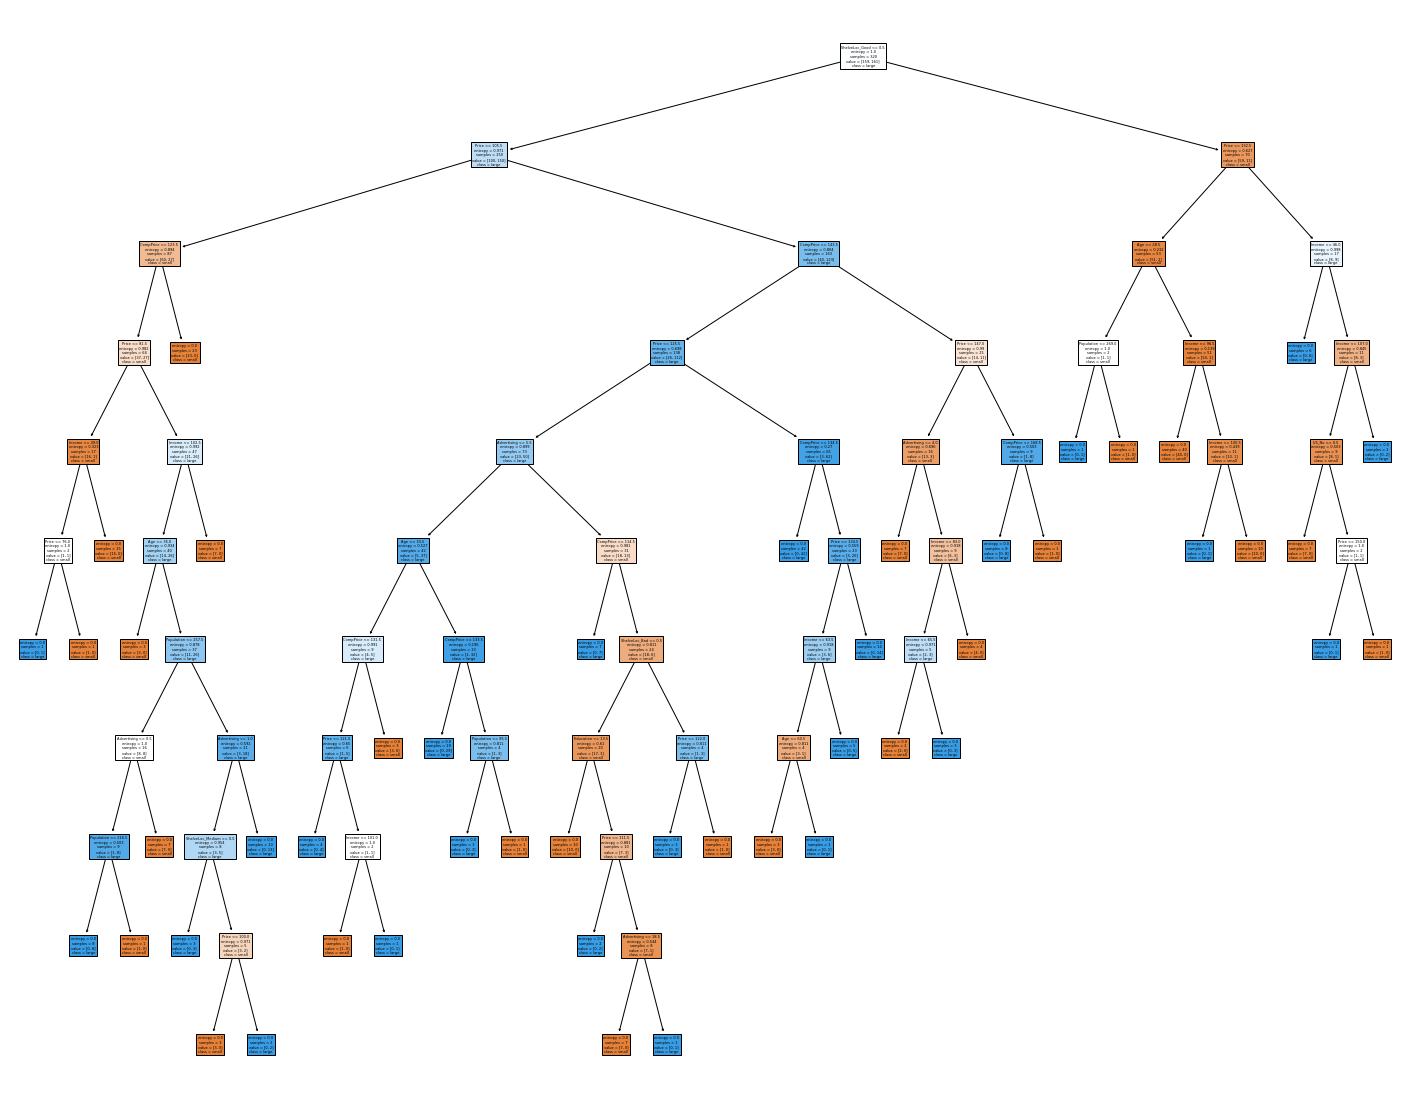

In [106]:
cols = list(df1.columns)
fn =['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes']
cn = ['small','large']
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [107]:
img=fig.savefig("decistion_tree.png")

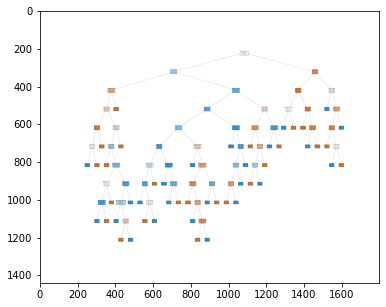

In [108]:
img = mpimg.imread('decistion_tree.png') 
plt.imshow(img)

4 - Conclusion
Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 70%
As seen in the confusion matrix of Test data 56 instances are presdected correctly and 24 instances are not

In [109]:
model.feature_importances_

array([0.16635472, 0.14860743, 0.11429198, 0.04323217, 0.32720311,
       0.05638183, 0.01057498, 0.01259022, 0.10416922, 0.00868999,
       0.        , 0.        , 0.00790436, 0.        ])

In [110]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [111]:
fi

,feature,importance
4,Price,0.327203
0,CompPrice,0.166355
1,Income,0.148607
2,Advertising,0.114292
8,ShelveLoc_Good,0.104169
5,Age,0.056382
3,Population,0.043232
7,ShelveLoc_Bad,0.012590
6,Education,0.010575
9,ShelveLoc_Medium,0.008690


As seen in the above table Price is most important feature